**Insurance Charges Prediction using Scikit Learn**

The scikit Learn portion contain all the EDA and plots as well linear regression model training using scikit learn.

All the questions in the **4.1-Task 01** are answered in the **Pytorch** section.

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [78]:
df = pd.read_csv('insurance_data.csv')

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Exploratory Data Analysis**

In [6]:
df.groupby('smoker')['charges'].mean()

,charges
smoker,
no,8434.268298
yes,32050.231832


<Axes: ylabel='count'>

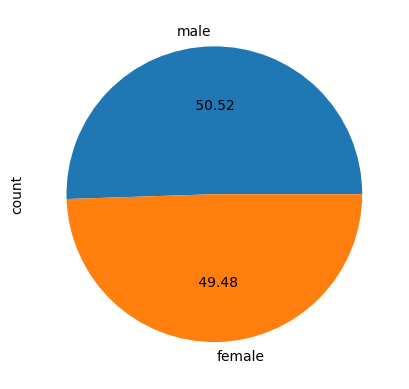

In [7]:
df['sex'].value_counts().plot(kind='pie',autopct='% .2f')
# 1 for male 0 for female here

In [8]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [9]:
df.duplicated().sum()

np.int64(1)

Distribution Plots tells us about the overall distribution of data, spread and variance of data.

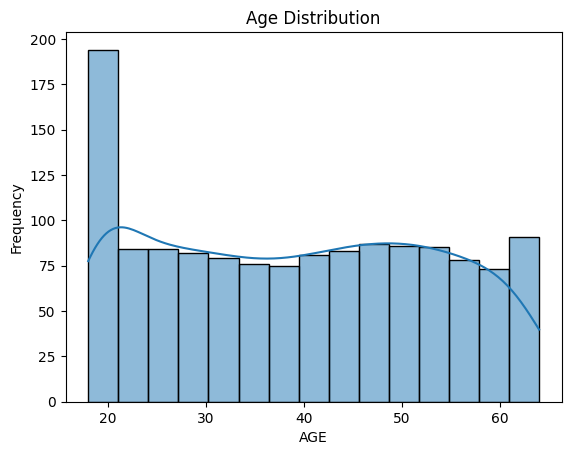

In [10]:
sns.histplot(df['age'], kde=True, bins=15)
plt.title("Age Distribution")
plt.xlabel("AGE")
plt.ylabel("Frequency")
plt.show()

The charges column(target) is highly right skewed which can cause to irregular insurance charges after inference.

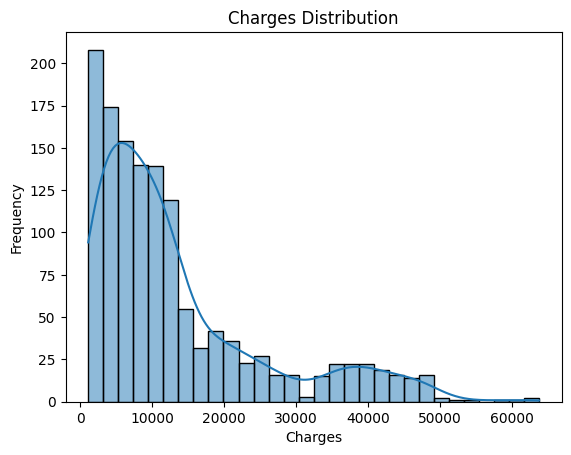

In [11]:
sns.histplot(df['charges'], kde=True)
plt.title("Charges Distribution")
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.show()

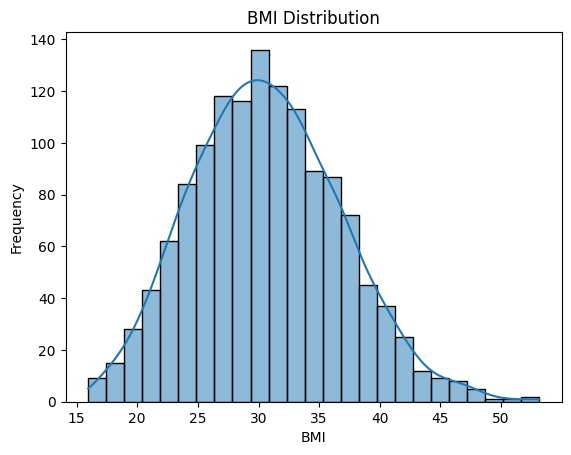

In [12]:
sns.histplot(df['bmi'], kde=True)
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

Bar Plots and Count plot are used on categorical columns to find out the frequency of each category and to check if there is any imabalance.

<Axes: ylabel='region'>

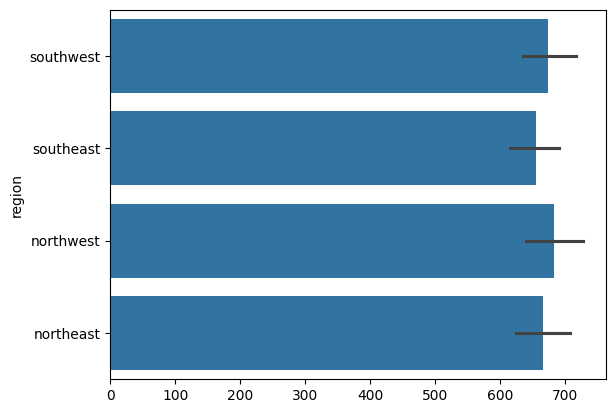

In [13]:
sns.barplot(df['region'])

<Axes: xlabel='count', ylabel='smoker'>

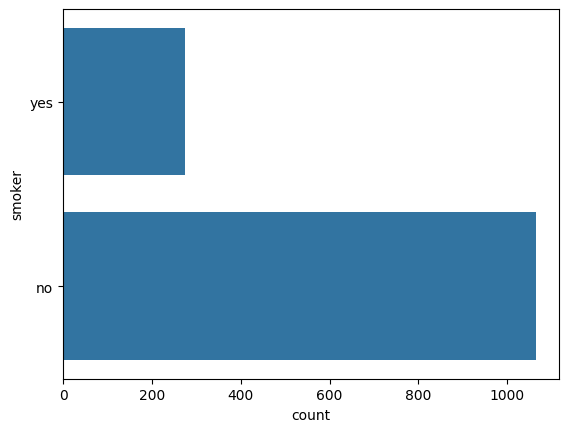

In [14]:
sns.countplot(df['smoker'])

Scatter Plot is used to find out if there is a linear relationship between the data. Linear Regression is used on linear data.

<Axes: xlabel='smoker', ylabel='charges'>

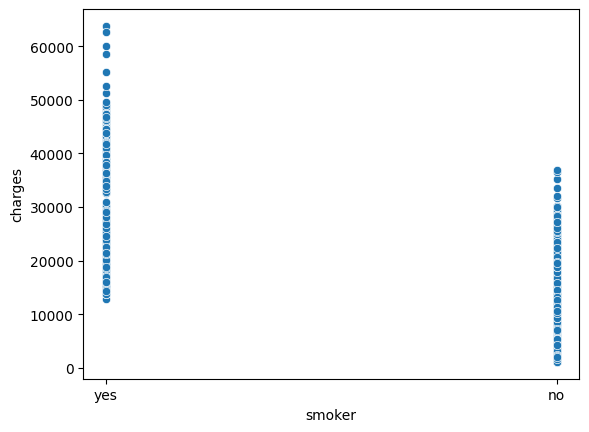

In [15]:
sns.scatterplot(x=df['smoker'],y=df['charges'])

<Axes: xlabel='age', ylabel='charges'>

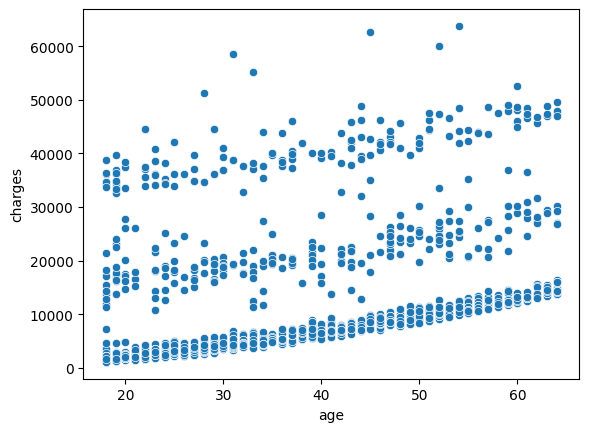

In [16]:
sns.scatterplot(x=df['age'], y=df['charges'])

<Axes: xlabel='bmi', ylabel='charges'>

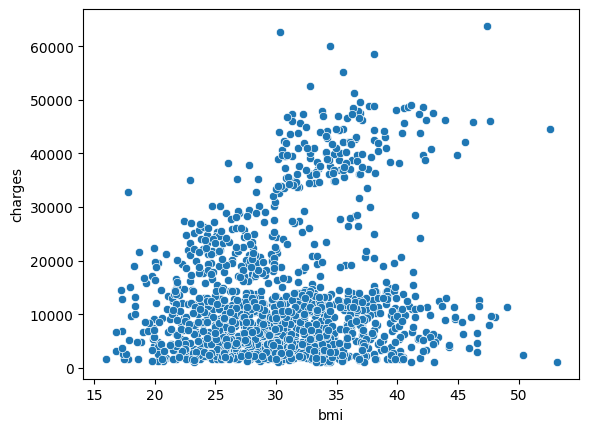

In [17]:
sns.scatterplot(x=df['bmi'],y = df['charges'] )

Box Plot is used to find out outliers

<Axes: ylabel='age'>

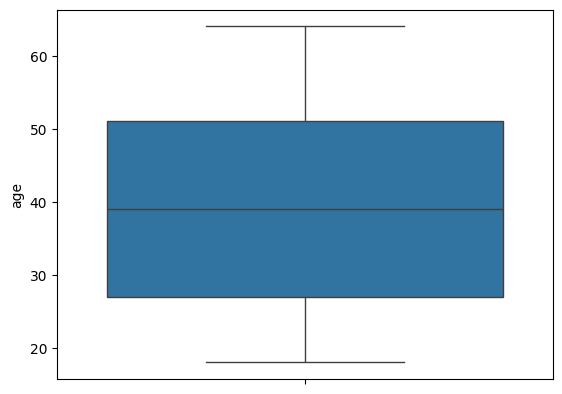

In [18]:
sns.boxplot(df['age'])

<Axes: ylabel='bmi'>

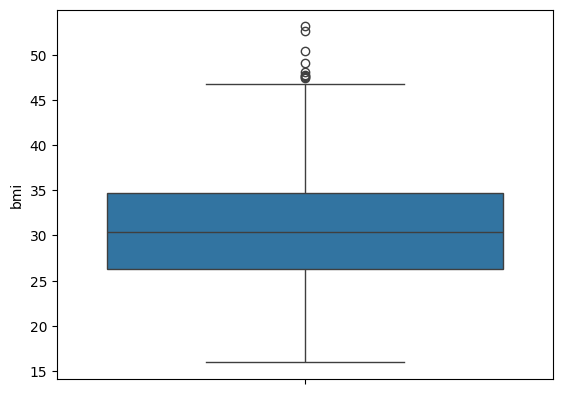

In [19]:
sns.boxplot(df['bmi'])

In [20]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [21]:
categorical = [col for col in df.columns if df[col].dtype == 'object']
categorical

['sex', 'smoker', 'region']

In [22]:
inputs  = df.iloc[:,:5]
inputs

,age,sex,bmi,children,smoker
0,19,female,27.900,0,yes
1,18,male,33.770,1,no
2,28,male,33.000,3,no
3,33,male,22.705,0,no
4,32,male,28.880,0,no
...,...,...,...,...,...
1333,50,male,30.970,3,no
1334,18,female,31.920,0,no
1335,18,female,36.850,0,no
1336,21,female,25.800,0,no


In [23]:
output = df['charges']
output

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


1. Overall goal of this function is to convert categorical columns into numerical using various techniques.
2. We can see that in the "Sex" and "Smoker" column we have only two categories [male,female] in "Sex" Column and [yes,no] in "Smoker" Column.
3. So we can either one hot encode it but it will increase the number of features so we will just use map and will map male to 1 and female to 0.
For the column of "region" we have four categories [northeast,northwest,southeast,southwest] we applied One Hot Encoding and set drop='first' to avoid multicolinearity.
5. After applying OHE to region we convert the encoded matrix to a dataframe and assign them column names then we convert their datatype from float to int for clarity and in the end we align the new encoded dataframe indexs with the orignal df and concat with the original df.





In [24]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np



ohe = OneHotEncoder(drop='first', sparse_output=False)

def customize_dataset_shayan(df):
    # Binary encoding for 'sex' and 'smoker'
    df['sex'] = df['sex'].map({'male': 1, 'female': 0})
    df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})

    # One-Hot Encode 'region'
    region_encoded = ohe.fit_transform(df[['region']])
    region_encoded_df = pd.DataFrame(region_encoded, columns=ohe.get_feature_names_out(['region']))
    region_encoded_df = region_encoded_df.astype(np.int64)
    region_encoded_df.index = df.index

    # Drop 'region' and join encoded region columns
    df = df.drop(columns=['region'])
    df = pd.concat([df, region_encoded_df], axis=1)


    return df


In [25]:
df = customize_dataset_shayan(df)

In [26]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


In [27]:
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val = train_test_split(df.drop(columns=['charges']), df['charges'],test_size=0.15 , random_state=42)





In [28]:
X_train.shape

(1137, 8)

In [29]:
X_val.shape

(201, 8)

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = ['age', 'bmi', 'children']

# Scale training data
X_train_scaled = X_train.copy()

X_train_scaled[numerical_features] = scaler.fit_transform(X_train[numerical_features])
print(X_train_scaled)

# Scale validation data using the same scaler
X_val_scaled = X_val.copy()

X_val_scaled[numerical_features] = scaler.transform(X_val[numerical_features])
print(X_val_scaled)

           age  sex       bmi  children  smoker  region_northwest  \
331   0.906079    1 -0.521189 -0.901419       1                 1   
796  -0.657217    1  2.232784  0.745028       0                 0   
1039 -1.438865    1 -0.536707  0.745028       0                 1   
261  -1.367806    0 -0.606128 -0.078195       1                 0   
70   -0.870394    0 -0.947516 -0.901419       1                 0   
...        ...  ...       ...       ...     ...               ...   
1095 -1.509924    0  0.130552  2.391475       0                 0   
1130 -0.017687    0 -1.091258  3.214698       0                 0   
1294  1.332433    1 -0.878095 -0.901419       0                 0   
860  -0.159804    0  2.784886  0.745028       1                 0   
1126  1.119256    1 -0.106296 -0.901419       0                 0   

      region_southeast  region_southwest  
331                  0                 0  
796                  1                 0  
1039                 0                 0  

In [31]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train_scaled,y_train)



LinearRegression()

In [32]:
y_pred = model.predict(X_val_scaled)

In [33]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

mse = mean_squared_error(y_val,y_pred)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(y_val,y_pred)
print("Mean Absolute Error:", mae)

r2Score = r2_score(y_val,y_pred)
print("R2 Score:", r2Score)

Mean Squared Error: 30833038.61799048
Mean Absolute Error: 4035.549736789495
R2 Score: 0.7975077281232326


**Model/Preprocessor Saving and Inference**

Model saving is necessary for using the model offline. without saving we will have to retrain the model again and again for inferencing.
After saving the model we can use it in web apps and mobile apps as well.

In [34]:
import pickle

model_data = {'model': model, 'scaler': scaler, 'ohe': ohe, 'feature_columns': df.drop(columns=['charges']).columns.tolist()}
with open('insurance_model.pkl', 'wb') as f:
    pickle.dump(model_data, f)

In [35]:
with open('insurance_model.pkl', 'rb') as f:
    loaded_data = pickle.load(f)

loaded_model = loaded_data['model']
loaded_scaler = loaded_data['scaler']
loaded_ohe = loaded_data['ohe']
feature_columns = loaded_data['feature_columns']

In [36]:
def predict_insurance(age, sex, bmi, children, smoker, region):
    """
    Make prediction for insurance charges

    Example:
    predict_insurance(25, 'male', 25.5, 1, 'no', 'northeast')
    """

    # Create input data
    input_data = pd.DataFrame({
        'age': [age],
        'sex': [sex],
        'bmi': [bmi],
        'children': [children],
        'smoker': [smoker],
        'region': [region]
    })

    # Apply same preprocessing as training
    processed_data = customize_dataset_shayan(input_data.copy())

    # Ensure all feature columns exist (add missing ones with 0)
    for col in feature_columns:
        if col not in processed_data.columns:
            processed_data[col] = 0

    # Reorder columns to match training data
    processed_data = processed_data[feature_columns]

    # Scale numerical features
    numerical_features = ['age', 'bmi', 'children']
    processed_data[numerical_features] = loaded_scaler.transform(processed_data[numerical_features])

    # Make prediction
    prediction = loaded_model.predict(processed_data)

    return prediction[0]

In [37]:
predict_insurance(25, 'male', 25.5, 1, 'no', 'northeast')

np.float64(3387.958784833503)

In [38]:
charge = predict_insurance(35, 'female', 43.5, 3, 'no', 'northeast')
print(f"Predicted charge: ${charge:.2f}")

Predicted charge: $12829.96


Just for Checking how other models will perform on this data and we can see that random forest without scalling the age bmi and charges we are getting r2 score of 85%.

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

# Fit the model
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_val)


In [40]:
# Evaluate performance
mse_rf = mean_squared_error(y_val, y_pred_rf)
mae_rf = mean_absolute_error(y_val, y_pred_rf)
r2_rf = r2_score(y_val, y_pred_rf)

print("Random Forest Results:")
print("Mean Squared Error:", mse_rf)
print("Mean Absolute Error:", mae_rf)
print("R² Score:", r2_rf)


Random Forest Results:
Mean Squared Error: 22318237.751219552
Mean Absolute Error: 2646.1164747010835
R² Score: 0.8534276584762757


**-----------------------------------------------------------------------------PYTORCH---------------------------------------------------------------------**

**Insurance Price Prediction Using PYTORCH.**

This Section contain model training using pytorch and answers to all questions given in the week-01 -- task-01.

Importing necessary Libraries

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Q1. Load the dataset using pd.read csv. How many rows and columns are in the dataset?
List the column names.

In [42]:
""" Loading the dataset and storing in a df variable for further use"""
df1 = pd.read_csv('insurance_data.csv')

In [43]:
df1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [44]:
"""Printing the number of rows and columns in the dataframe"""
df1.shape

(1338, 7)

In [45]:
"""Listing all the column names of the dataset"""
df1.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

Q3. Identify the input, categorical, and output columns. Why is it necessary to convert categorical columns to numerical codes?

In [46]:
""" input columns """
input_columns = df1.drop(columns=['charges'],axis=1)

In [47]:
input_columns

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


In [48]:
"""Categorical Columns"""
categorical_colums = [col for col in df1.columns if df1[col].dtype == 'object']


In [49]:
df1[categorical_colums]

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [50]:
target_column = df1['charges']

In [51]:
target_column

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


Why is it necessary to convert categorical columns into numerical codes?.

**Answer:**

Machine learning Algorithms does not understand text and only understand numbers thats why we covert categorical columns into numerical

Q2. Implement the customize dataset function using your name (at least 5 characters).
Explain how the function modifies the dataset.

Answer:
*   Overall goal of this function is to convert categorical columns into numerical using various techniques.
*   We can see that in the "Sex" and "Smoker" column we have only two categories [male,female] in "Sex" Column and [yes,no] in "Smoker" Column.
* So we can either one hot encode it but it will increase the number of features so we will just use map and will map male to 1 and female to 0.
* For the column of "region" we have four categories [northeast,northwest,southeast,southwest] we applied One Hot Encoding and set drop='first' to avoid multicolinearity.
* After applying OHE to region we convert the encoded matrix to a dataframe
and assign them column names then we convert their datatype from float to int for clarity and in the end we align the new encoded dataframe indexs with the orignal df and concat with the original df.



In [52]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop='first', sparse_output=False)

def customize_dataset_pytorch_shayan(df):
    # Binary encoding for 'sex' and 'smoker'
    df['sex'] = df['sex'].map({'male': 1, 'female': 0})
    df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})

    # One-Hot Encode 'region'
    region_encoded = ohe.fit_transform(df[['region']])


    # Create DataFrame with proper column names
    region_encoded_df = pd.DataFrame(region_encoded, columns=ohe.get_feature_names_out(['region']))

    region_encoded_df = region_encoded_df.astype(np.int64)

    # Reset index to align properly when concatenating
    region_encoded_df.index = df.index

    # Drop original 'region' as their is no need for that column and join new encoded columns
    df = df.drop(columns=['region'])
    df = pd.concat([df, region_encoded_df], axis=1)

    return df

In [53]:
# Applying the customize_dataset_shayan function to dataset
df1 = customize_dataset_pytorch_shayan(df1)

In [54]:
# checking if the transformations has been correctly applied or not
df1.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


In [55]:
df1.sample(5)

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
1211,39,1,34.100,2,0,23563.01618,0,1,0
176,38,1,27.835,2,0,6455.86265,1,0,0
38,35,1,36.670,1,1,39774.27630,0,0,0
246,60,0,38.060,0,0,12648.70340,0,1,0
1027,23,1,18.715,0,0,21595.38229,1,0,0


In [56]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   charges           1338 non-null   float64
 6   region_northwest  1338 non-null   int64  
 7   region_southeast  1338 non-null   int64  
 8   region_southwest  1338 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 94.2 KB


In [57]:
X_pytorch = df1.drop(columns=['charges'])
X_pytorch

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,0,0,1
1,18,1,33.770,1,0,0,1,0
2,28,1,33.000,3,0,0,1,0
3,33,1,22.705,0,0,1,0,0
4,32,1,28.880,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,0,0
1334,18,0,31.920,0,0,0,0,0
1335,18,0,36.850,0,0,0,1,0
1336,21,0,25.800,0,0,0,0,1


In [58]:
y_pytorch = df1['charges']
y_pytorch

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


Q5. Split the dataset into training and validation sets with val percent = 0.15. What
are the sizes of the training and validation sets?

In [59]:
from sklearn.model_selection import  train_test_split

val_percent = 0.15

X_train_pytorch,X_val_pytorch,y_train_pytorch,y_val_pytorch = train_test_split(X_pytorch,y_pytorch,test_size=val_percent,random_state=42)


print("=== Training and Validation Set sizes ===")
print(f"X Train Size: {X_train_pytorch.shape}")
print(f"X Test Size: {X_val_pytorch.shape}")
print(f"Y Train Size: {y_train_pytorch.shape}")
print(f"Y Test Size: {y_val_pytorch.shape}")



=== Training and Validation Set sizes ===
X Train Size: (1137, 8)
X Test Size: (201, 8)
Y Train Size: (1137,)
Y Test Size: (201,)


In [60]:
X_train_pytorch

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest
331,52,1,27.360,0,1,1,0,0
796,30,1,44.220,2,0,0,1,0
1039,19,1,27.265,2,0,1,0,0
261,20,0,26.840,1,1,0,1,0
70,27,0,24.750,0,1,0,1,0
...,...,...,...,...,...,...,...,...
1095,18,0,31.350,4,0,0,0,0
1130,39,0,23.870,5,0,0,1,0
1294,58,1,25.175,0,0,0,0,0
860,37,0,47.600,2,1,0,0,1


Performing Scalling to bring all features on a same scale.
using "StandardScaler"

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = ['age', 'bmi', 'children']

# Scale training data
X_train_scaledP = X_train_pytorch.copy()
X_train_scaledP[numerical_features] = scaler.fit_transform(X_train_pytorch[numerical_features])

# Scale validation data using the same scaler
X_val_scaledP = X_val_pytorch.copy()
X_val_scaledP[numerical_features] = scaler.transform(X_val_pytorch[numerical_features])

Q4. Convert the dataset to PyTorch tensors using dataframe to arrays. What are the
shapes of the input and target arrays?

In [62]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader,TensorDataset

# Converting the dataset to pytorch tensors
X_train_tensor = torch.tensor(X_train_scaledP.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_pytorch.values, dtype=torch.float32)

X_val_tensor = torch.tensor(X_val_scaledP.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val_pytorch.values, dtype=torch.float32)


# Printing the shapes of the input and output arrays
print("=== Tensor Shapes ===")
print(f"X_train_tensor shape: {X_train_tensor.shape}")
print(f"y_train_tensor shape: {y_train_tensor.shape}")
print(f"X_val_tensor shape: {X_val_tensor.shape}")
print(f"y_val_tensor shape: {y_val_tensor.shape}")


=== Tensor Shapes ===
X_train_tensor shape: torch.Size([1137, 8])
y_train_tensor shape: torch.Size([1137])
X_val_tensor shape: torch.Size([201, 8])
y_val_tensor shape: torch.Size([201])


In [63]:
# Compute mean and std only from training set
mean_y = y_train_tensor.mean()
std_y = y_train_tensor.std()

# Normalize targets
y_train_norm = (y_train_tensor - mean_y) / std_y
y_val_norm = (y_val_tensor - mean_y) / std_y

# This is the same as what standard scaler do in behind the scene.

Q6. Create a DataLoader with batch size = 16. Print the first batch of inputs and
targets.

In [64]:
train_dataset = TensorDataset(X_train_tensor,y_train_norm)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=False)


val_dataset = TensorDataset(X_val_tensor,y_val_norm)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False )



for batch in train_loader:
  inputs,targets = batch
  print("Inputs (first batch) Train Dataset:", inputs)
  print("Targets (first batch) Train Dataset:", targets)
  break


for batch in val_loader:
  inputs,targets = batch
  print("Inputs (first batch) Validation Dataset", inputs)
  print("Targets (first batch) Validation Dataset", targets)
  break


Inputs (first batch) Train Dataset: tensor([[ 0.9061,  1.0000, -0.5212, -0.9014,  1.0000,  1.0000,  0.0000,  0.0000],
        [-0.6572,  1.0000,  2.2328,  0.7450,  0.0000,  0.0000,  1.0000,  0.0000],
        [-1.4389,  1.0000, -0.5367,  0.7450,  0.0000,  1.0000,  0.0000,  0.0000],
        [-1.3678,  0.0000, -0.6061, -0.0782,  1.0000,  0.0000,  1.0000,  0.0000],
        [-0.8704,  0.0000, -0.9475, -0.9014,  1.0000,  0.0000,  1.0000,  0.0000],
        [ 0.7640,  1.0000, -0.6764, -0.9014,  0.0000,  1.0000,  0.0000,  0.0000],
        [-1.2257,  0.0000, -1.5143,  1.5683,  0.0000,  1.0000,  0.0000,  0.0000],
        [ 0.6218,  1.0000,  1.5680, -0.9014,  0.0000,  0.0000,  1.0000,  0.0000],
        [-1.0125,  0.0000, -1.5927, -0.0782,  0.0000,  0.0000,  0.0000,  1.0000],
        [ 1.6167,  1.0000, -1.4947, -0.9014,  0.0000,  0.0000,  0.0000,  1.0000],
        [ 1.2614,  0.0000, -1.0733, -0.0782,  0.0000,  0.0000,  1.0000,  0.0000],
        [ 0.4797,  0.0000,  2.8617,  0.7450,  0.0000,  0.0000,

Q7. Define the InsuranceModel class. Why is nn.Linear used, and what are the input
and output sizes?

Why is nn.Linear used?
nn.Linear is used because:


1.   It performs linear regression: y = mx + b (m is slope and b is y-intercept)
2.   Map featurs input to single output value
3.   Suitable for regression tasks.





Q9 .(part i)Make predictions for three validation samples using predict single. Compare predictions with actual targets.




In [65]:
class InsuranceModel(nn.Module):
  def __init__(self,input_dim):
    super(InsuranceModel,self).__init__()
    self.linear = nn.Linear(input_dim,1)

  def forward(self,x):
    return self.linear(x)

  def predict_single(self,x):
    self.eval()
    with torch.no_grad():
      if len(x.shape) == 1:
        x = x.unsqueeze(0)

      prediction = self.forward(x)
      return (prediction * std_y + mean_y).item()

In [66]:
input_size = X_train_tensor.shape[1]
model = InsuranceModel(input_size)
print(model)

InsuranceModel(
  (linear): Linear(in_features=8, out_features=1, bias=True)
)


Input and Output sizes

In [67]:
print("=== Model Architecture ===")
print(f"Model: {model}")
print(f"Input size: {input_size} features")
print(f"Output size: 1 (insurance charge prediction)")


=== Model Architecture ===
Model: InsuranceModel(
  (linear): Linear(in_features=8, out_features=1, bias=True)
)
Input size: 8 features
Output size: 1 (insurance charge prediction)


Defining Loss function and optimizer

In [68]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)
print(criterion)
print(optimizer)

MSELoss()
SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)


Q8. Train the model for 500 epochs with lr = 1e-2. Plot the validation loss over epochs.
What trend do you observe?

In [69]:
epochs = 50
train_losses = []
val_losses = []

print("=== Training Progress ===")
for epoch in range(epochs):
    # Training phase
    model.train()
    train_loss = 0.0
    for batch_inputs, batch_targets in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_inputs)
        batch_targets = batch_targets.view(-1, 1)
        loss = criterion(outputs, batch_targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    train_loss /= len(train_loader)
    train_losses.append(train_loss)

    # Validation phase
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for batch_inputs, batch_targets in val_loader:
            outputs = model(batch_inputs)
            batch_targets = batch_targets.view(-1, 1)
            loss = criterion(outputs, batch_targets)
            val_loss += loss.item()

    val_loss /= len(val_loader)
    val_losses.append(val_loss)

    if (epoch + 1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')


=== Training Progress ===
Epoch [5/50], Train Loss: 0.3705, Val Loss: 0.3041
Epoch [10/50], Train Loss: 0.2693, Val Loss: 0.2178
Epoch [15/50], Train Loss: 0.2581, Val Loss: 0.2066
Epoch [20/50], Train Loss: 0.2567, Val Loss: 0.2049
Epoch [25/50], Train Loss: 0.2564, Val Loss: 0.2047
Epoch [30/50], Train Loss: 0.2563, Val Loss: 0.2047
Epoch [35/50], Train Loss: 0.2563, Val Loss: 0.2049
Epoch [40/50], Train Loss: 0.2563, Val Loss: 0.2050
Epoch [45/50], Train Loss: 0.2563, Val Loss: 0.2051
Epoch [50/50], Train Loss: 0.2563, Val Loss: 0.2052


i. We can see that after about 20 epochs our loss is constant which means that even if we train for 20 epochs we will get the same result.

Plotting the Validation and Training Loss over epochs

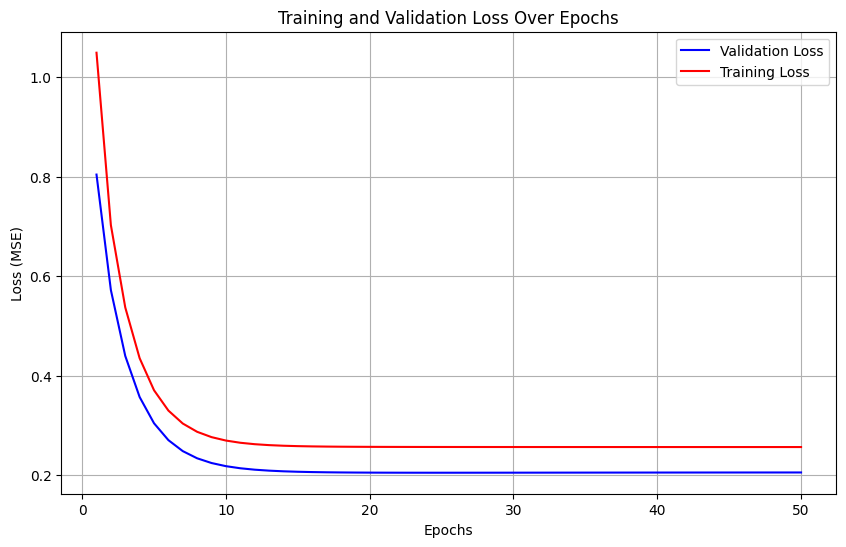

In [70]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), val_losses, 'b-', label='Validation Loss')
plt.plot(range(1, epochs + 1), train_losses, 'r-', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

Q9. Make predictions for three validation samples using predict single. Compare predictions with actual targets.

In [71]:
print("=== Predictions for Three Validation Samples ===")
for i in range(3):
    sample_input = X_val_tensor[i]
    actual_target = y_val_tensor[i].item()
    predicted_value = model.predict_single(sample_input)

    print(f"Sample {i+1}:")
    print(f"  Actual: ${actual_target:.2f}")
    print(f"  Predicted: ${predicted_value:.2f}")
    print(f"  Difference: ${abs(actual_target - predicted_value):.2f}")
    print()

=== Predictions for Three Validation Samples ===
Sample 1:
  Actual: $9095.07
  Predicted: $9019.73
  Difference: $75.34

Sample 2:
  Actual: $5272.18
  Predicted: $7106.73
  Difference: $1834.55

Sample 3:
  Actual: $29330.98
  Predicted: $36907.92
  Difference: $7576.94



i. From these metrics MSE is not helping us while MAE error is giving is shown in term of charges

ii. The most import metric here is r2_score which is around 80% means that our model is able to explain 80% of variance of the target.(charges)
iii. this is a good start for linear regression now majority of another models will give us good results.

In [72]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


model.eval()
with torch.no_grad():
    predictions = model(X_val_tensor).view(-1)
    # Denormalize predictions
    predictions = predictions * std_y + mean_y
    predictions = predictions.numpy()
    y_val_np = y_val_tensor.numpy()

mse = mean_squared_error(y_val_np, predictions)
mae = mean_absolute_error(y_val_np, predictions)
r2 = r2_score(y_val_np, predictions)

print("=== Final Evaluation Metrics ===")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

=== Final Evaluation Metrics ===
Mean Squared Error: 30664742.0000
Mean Absolute Error: 4039.1997
R² Score: 0.7986


Q10. Saving the model and all the preprocessors. Why is model saving important for deployment?

Model saving is crucial for deployment because it lets you reuse a trained model without retraining, saving time and resources. It ensures consistent performance across environments and enables fast predictions in real-time systems.

In [73]:
torch.save(model.state_dict(), 'insurance_model.pth')

In [74]:
import joblib

# Save all preprocessing components
preprocessing_data = {
    'scaler': scaler,
    'mean_y': mean_y,
    'std_y': std_y,
    'ohe': ohe,  # Make sure to keep the OneHotEncoder reference from customize_dataset_shayan
    'feature_order': X_train_pytorch.columns.tolist()  # Save feature order
}

joblib.dump(preprocessing_data, 'preprocessing_data.joblib')

['preprocessing_data.joblib']

Performing Inference using the saved model and preprocessors

In [75]:

import torch
import joblib
import numpy as np
import pandas as pd

class InsurancePredictor:
    def __init__(self, model_path, preprocessing_path):
        # Load preprocessing components
        preprocessing_data = joblib.load(preprocessing_path)

        self.scaler = preprocessing_data['scaler']
        self.mean_y = preprocessing_data['mean_y']
        self.std_y = preprocessing_data['std_y']
        self.ohe = preprocessing_data['ohe']
        self.feature_order = preprocessing_data['feature_order']

        input_dim = len(self.feature_order)
        self.model = nn.Linear(input_dim, 1)

        # Load model weights with key renaming
        state_dict = torch.load(model_path)

        # Remove 'linear.' prefix from keys
        new_state_dict = {}
        for key, value in state_dict.items():
            new_key = key.replace('linear.', '')  # Remove the prefix
            new_state_dict[new_key] = value

        self.model.load_state_dict(new_state_dict)
        self.model.eval()

    def preprocess_input(self, input_data):
        """Convert raw input into model-ready format"""
        # Convert to DataFrame if not already
        if not isinstance(input_data, pd.DataFrame):
            input_data = pd.DataFrame([input_data])

        # Apply same preprocessing as training
        input_data['sex'] = input_data['sex'].map({'male': 1, 'female': 0})
        input_data['smoker'] = input_data['smoker'].map({'yes': 1, 'no': 0})

        # One-hot encode region
        region_encoded = self.ohe.transform(input_data[['region']])
        region_encoded_df = pd.DataFrame(region_encoded,
                                      columns=self.ohe.get_feature_names_out(['region']))
        region_encoded_df = region_encoded_df.astype(np.int64)

        # Combine features
        input_data = input_data.drop(columns=['region'])
        input_data = pd.concat([input_data, region_encoded_df], axis=1)

        # Ensure correct feature order
        input_data = input_data[self.feature_order]

        # Scale numerical features
        numerical_features = ['age', 'bmi', 'children']
        input_data[numerical_features] = self.scaler.transform(input_data[numerical_features])

        return torch.tensor(input_data.values, dtype=torch.float32)

    def predict(self, input_data):
        """Make prediction on new data"""
        # Preprocess
        processed_input = self.preprocess_input(input_data)

        # Predict
        with torch.no_grad():
            normalized_pred = self.model(processed_input)
            prediction = (normalized_pred * self.std_y + self.mean_y).item()

        return prediction



In [76]:
# Initialize predictor
predictor = InsurancePredictor('insurance_model.pth', 'preprocessing_data.joblib')

# Make prediction
sample_input = {
    'age': 45,
    'sex': 'male',
    'bmi': 48.5,
    'children': 3,
    'smoker': 'yes',
    'region': 'southeast'
}
prediction = predictor.predict(sample_input)
print(f"Predicted insurance charge: ${prediction:.2f}")

Predicted insurance charge: $40352.02
